## Spam URL Classification: Getting Started

View Dataset Here - https://www.kaggle.com/shivamb/spam-url-prediction

In [1]:
import plotly.express as px
import pandas as pd 
df = pd.read_csv("../input/spam-url-prediction/url_spam_classification.csv")
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [2]:
vc = df['is_spam'].value_counts().to_frame().reset_index().head(15)
fig = px.bar(x=vc["is_spam"][::-1], y=vc["index"][::-1], orientation='h', color=vc['index'])
fig.update_layout(title = "Spam URL Distributions", xaxis_title="Num URLs", yaxis_title = "", width=600, plot_bgcolor="#fff", showlegend = False)
fig.show()

Let's create a few features

In [3]:
df['len_url'] = df['url'].apply(lambda x : len(x))
df['contains_subscribe'] = df['url'].apply(lambda x : 1 if "subscribe" in x else 0)
df['contains_hash'] = df['url'].apply(lambda x : 1 if "#" in x else 0)
df['num_digits'] = df['url'].apply(lambda x : len("".join(_ for _ in x if _.isdigit())) )
df['non_https'] = df['url'].apply(lambda x : 1 if "https" in x else 0)
df['num_words'] = df['url'].apply(lambda x : len(x.split("/")))
df.head()

,url,is_spam,len_url,contains_subscribe,contains_hash,num_digits,non_https,num_words
0,https://briefingday.us8.list-manage.com/unsubs...,True,51,1,0,1,1,4
1,https://www.hvper.com/,True,22,0,0,0,1,4
2,https://briefingday.com/m/v4n3i4f3,True,34,0,0,4,1,5
3,https://briefingday.com/n/20200618/m#commentform,False,48,0,1,8,1,6
4,https://briefingday.com/fan,True,27,0,0,0,1,4


In [4]:
fig = px.histogram(df, x="len_url", color="is_spam")
fig.update_layout(title = "URLs length by Spam / Non Spam", xaxis_title="URL Length", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)
fig.show()

In [5]:
fig = px.histogram(df, x="num_digits", color="is_spam")
fig.update_layout(title = "URLs Digit Counts by Spam / Non Spam", xaxis_title="Number of Digits", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)
fig.show()

In [6]:
fig = px.histogram(df, x="num_words", color="is_spam")
fig.update_layout(title = "URLs Number of Words by Spam / Non Spam", xaxis_title="Num Words", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)
fig.show()

ROC-AUC-score:  0.8209149813245185


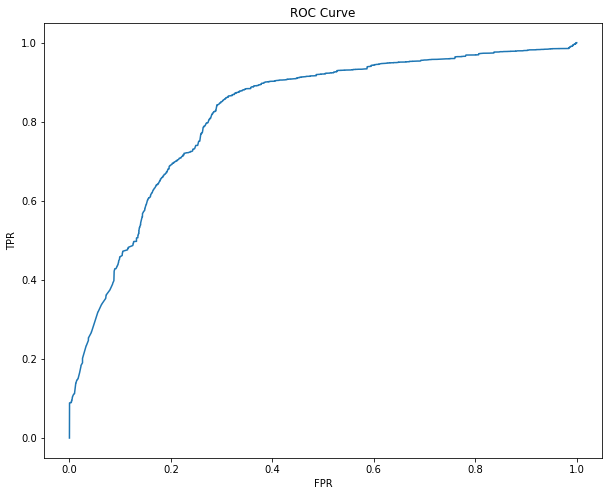

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score, roc_curve

target = 'is_spam'
features = [f for f in df.columns if f not in ["url", target]]
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

sc = MinMaxScaler()
clf = LogisticRegression()
pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])
pipe_lr.fit(X_train, y_train)

test_probas = pipe_lr.predict_proba(X_test)[:,1]

plt.figure(figsize=(10,8))
fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

Thanks for viewing, check the dataset here - https://www.kaggle.com/shivamb/spam-url-prediction